Przygotować programy do aproksymacji średniokwadratowej trygonometrycznej

In [1]:
import numpy as np
from math import pi, sin, cos
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * cos(1.5 * x)

f_range_a = -4 * pi
f_range_b = 4 * pi

In [3]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = list(map(func, func_x))

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

In [4]:
def calculate_approx(xs_original, ys, n, m):
    
    if n // 2 < m:
        raise Exception("Wrong m value")
    
    xs = deepcopy(xs_original) # So original data won't get destroyed
    
    a_from = f_range_a
    b_from = f_range_b
    a_to = -pi
    b_to = pi
    
    transform = lambda x : ((x - a_from) / (b_from - a_from)) * (b_to - a_to) + a_to
    
    xs = list(map(transform, xs))
    
    A = lambda j : (2 / n) * sum(ys[i] * cos(j * xs[i]) for i in range(1, n))
    
    B = lambda j : (2 / n) * sum(ys[i] * sin(j * xs[i]) for i in range(1, n))
        
    return lambda x : 0.5 * A(0) + sum(A(j) * cos(j * transform(x)) + B(j) * sin(j * transform(x)) for j in range(1, m + 1))


In [5]:
def draw_approx(n, m, img):
    
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = list(map(f, xs))
    
    calculated_function = calculate_approx(xs, ys, n, m)

    plot_function(f, f_range_a, f_range_b, "Zadana funkcja", "blue")
    plot_function(calculated_function, f_range_a, f_range_b, "Funkcja aproksymująca", "red")

    plt.scatter(xs, ys, color = 'black', label = "Nodes")
    plt.title("Function approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig(img + ".png")
    plt.show()

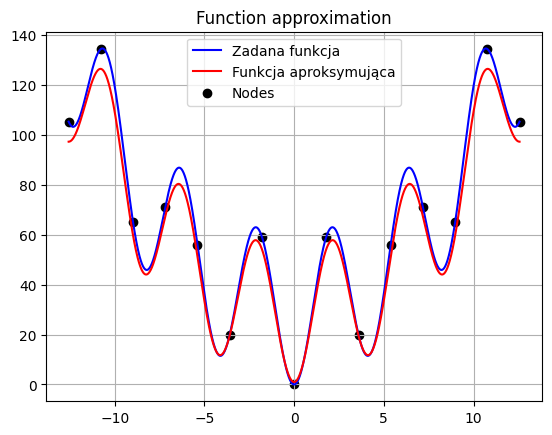

In [6]:
draw_approx(15, 6, "demo")

In [14]:
def approx(n, m):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, n, m)

    return calculated_function

Sposoby obliczania błędów aproksymacji

Błąd maksymalny

In [8]:
def approximation_maximum_difference(n, m, test_points = 1000):

    maksimum = float('-inf')

    #Evenly distributed xs
    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m)

    for i in range(test_points):

        temp = abs(f(xs[i]) - approx_function(xs[i]))

        maksimum = temp if temp > maksimum else maksimum
    
    return maksimum

Błąd średniokwadratowy

In [9]:
def mean_difference(n, m, test_points = 1000):

    suma = 0

    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m)

    for i in range(test_points):

        suma += (f(xs[i]) - approx_function(xs[i]))
    
    return(f"{suma / test_points}")

Analiza

In [31]:
def errors(n, desc): # Stałe węzły
    
    max_diff = [approximation_maximum_difference(n, m, 1000) for m in range(1, n // 2 + 1)]
    mean_diff = [approximation_mean_difference(n, m, 1000) for m in range(1, n // 2 + 1)]
    
    if desc == True:
    
        print("degree | max diff | mean diff")
        for i in range(len(max_diff)):
            print(i + 1, " | ", max_diff[i], " | ", mean_diff[i])
    
    else:
        
        print("max diff")
        for x in max_diff:
            print(x)
        print("mean diff")
        for x in mean_diff:
            print(x)

In [97]:
def errors2(m, desc): # Stałe stopnie
    
    max_diff = [approximation_maximum_difference(n, m, 1000) for n in range(2 * m, 100 + 1)]
    mean_diff = [approximation_mean_difference(n, m, 1000) for n in range(2 * m, 100 + 1)]
    
    if desc == True:
    
        print("degree | max diff | mean diff")
        for i in range(len(max_diff)):
            print(2 * m + i, " | ", max_diff[i], " | ", mean_diff[i])
    
    else:
        
        print("max diff")
        for x in max_diff:
            print(x)
        print("mean diff")
        for x in mean_diff:
            print(x)

In [12]:
def analyse(n, m, img, test_points = 1000):
    
    print("Max: ", approximation_maximum_difference(n, m, test_points), "Mean: ", approximation_mean_difference(n, m, test_points))
    draw_approx(n, m, img)

Dla 6 węzłów

In [32]:
errors(6, True)

degree | max diff | mean diff
1  |  64.10180639738228  |  8.533818372770538
2  |  56.467320049805444  |  8.51829970075427
3  |  55.54782649625173  |  8.502781028738028


In [27]:
errors(6, False)

max diff
64.10180639738228
56.467320049805444
55.54782649625173
mean diff
8.533818372770538
8.51829970075427
8.502781028738028


Max:  56.467320049805444 Mean:  8.51829970075427


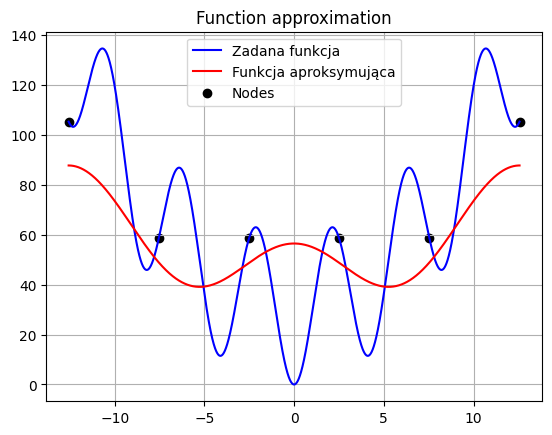

In [33]:
analyse(6, 2, "img01")

Max:  55.54782649625173 Mean:  8.502781028738028


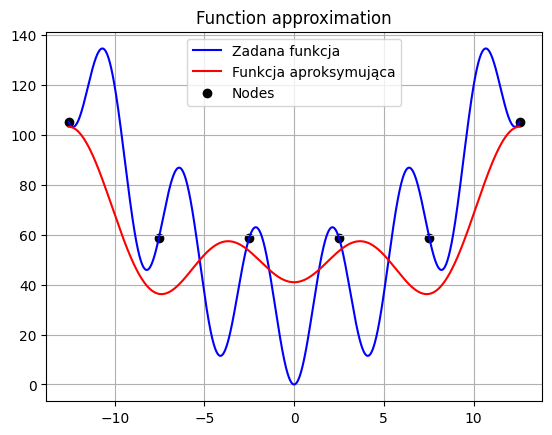

In [34]:
analyse(6, 3, "img02")

In [35]:
errors(10, True)

degree | max diff | mean diff
1  |  39.733591977947526  |  5.72962779237973
2  |  38.29757372264207  |  5.718303503035978
3  |  51.44348701683743  |  5.73906493827874
4  |  56.26750227543689  |  5.734240541343083
5  |  51.44370170576239  |  5.729416144407416


In [36]:
errors(10, False)

max diff
39.733591977947526
38.29757372264207
51.44348701683743
56.26750227543689
51.44370170576239
mean diff
5.72962779237973
5.718303503035978
5.73906493827874
5.734240541343083
5.729416144407416


Max:  38.29757372264207 Mean:  5.718303503035978


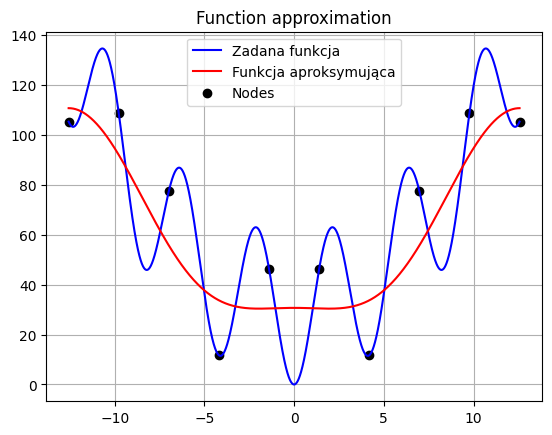

In [43]:
analyse(10, 2, "img04")

Max:  51.44348701683743 Mean:  5.73906493827874


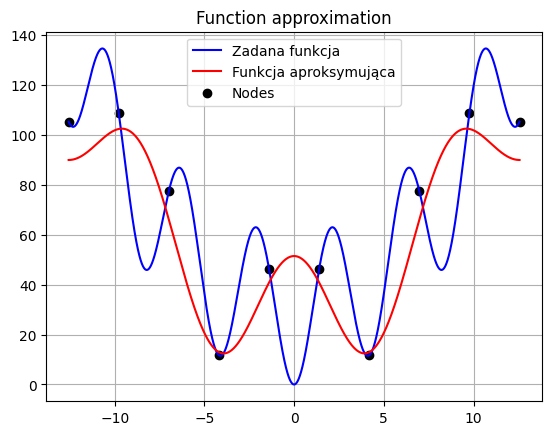

In [44]:
analyse(10, 3, "img05")

Max:  56.26750227543689 Mean:  5.734240541343083


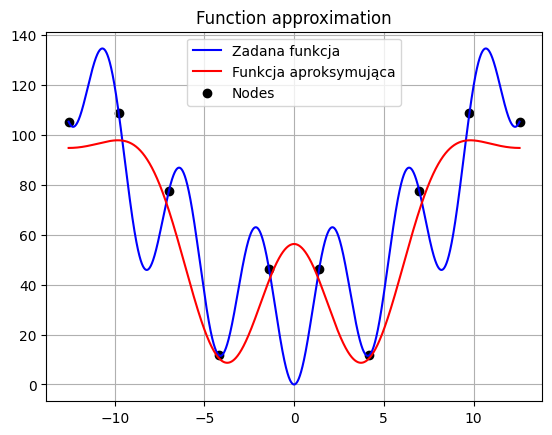

In [45]:
analyse(10, 4, "img06")

Max:  51.44370170576239 Mean:  5.729416144407416


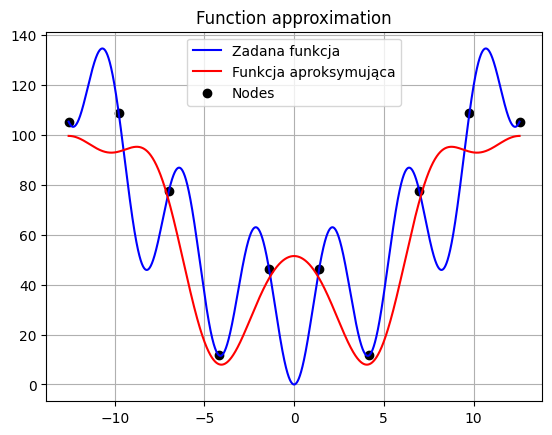

In [46]:
analyse(10, 5, "img07")

In [47]:
errors(15, True)

degree | max diff | mean diff
1  |  37.569299077264944  |  4.005009639595478
2  |  35.90495725813127  |  3.9943578539727707
3  |  35.91184217962095  |  3.989199508120748
4  |  33.30832366654643  |  3.9859189868601574
5  |  35.51559035613934  |  3.9834486874404926
6  |  10.285330902589479  |  4.009338970662335
7  |  11.414868952136942  |  4.007333717704645


In [48]:
errors(15, False)

max diff
37.569299077264944
35.90495725813127
35.91184217962095
33.30832366654643
35.51559035613934
10.285330902589479
11.414868952136942
mean diff
4.005009639595478
3.9943578539727707
3.989199508120748
3.9859189868601574
3.9834486874404926
4.009338970662335
4.007333717704645


Max:  33.30832366654643 Mean:  3.9859189868601574


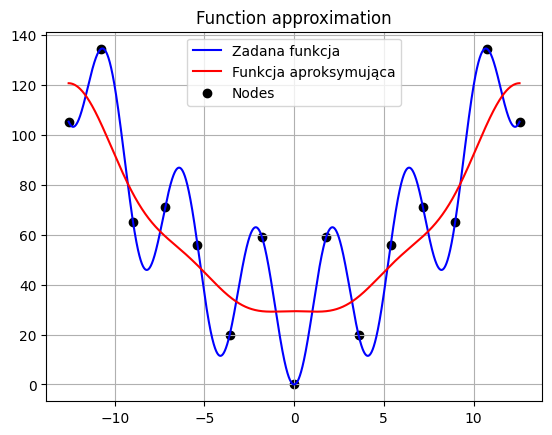

In [50]:
analyse(15, 4, "img09")

Max:  35.51559035613934 Mean:  3.9834486874404926


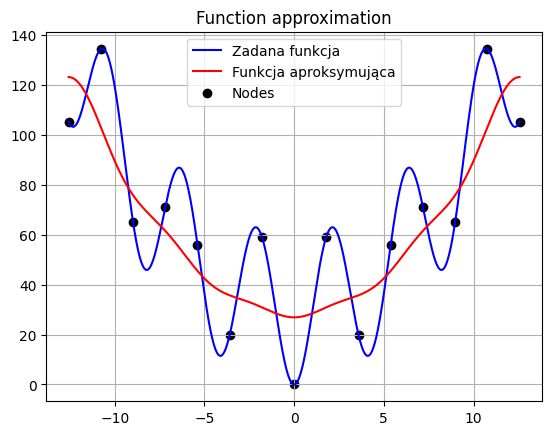

In [51]:
analyse(15, 5, "img10")

Max:  10.285330902589479 Mean:  4.009338970662335


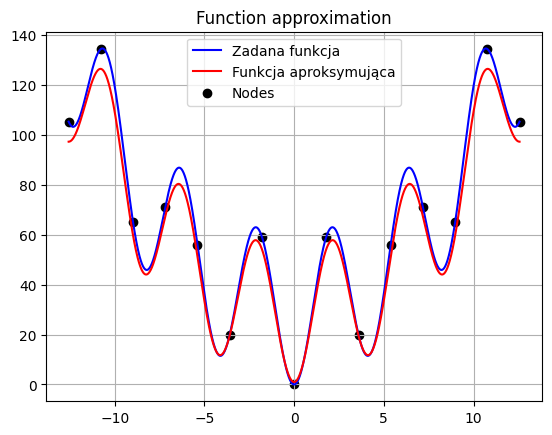

In [52]:
analyse(15, 6, "img11")

Max:  11.414868952136942 Mean:  4.007333717704645


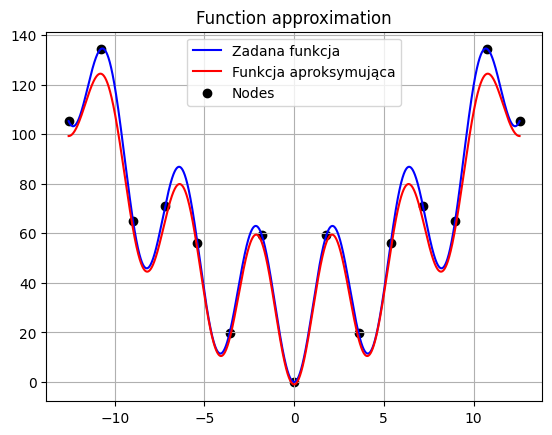

In [53]:
analyse(15, 7, "img12")

In [54]:
errors(20, True)

degree | max diff | mean diff
1  |  36.36276917295515  |  3.069251343607982
2  |  34.83198398101779  |  3.058740399993166
3  |  34.82996514297328  |  3.053848394241236
4  |  32.54569653903219  |  3.05091096602931
5  |  33.72355952844032  |  3.048863696029515
6  |  8.880177698520725  |  3.0757825164255683
7  |  8.08047835401392  |  3.0744611329119906
8  |  8.462766260269944  |  3.0732819027072824
9  |  8.704712964676474  |  3.0721661277409735
10  |  8.895786648416689  |  3.0710503527746638


In [55]:
errors(20, False)

max diff
36.36276917295515
34.83198398101779
34.82996514297328
32.54569653903219
33.72355952844032
8.880177698520725
8.08047835401392
8.462766260269944
8.704712964676474
8.895786648416689
mean diff
3.069251343607982
3.058740399993166
3.053848394241236
3.05091096602931
3.048863696029515
3.0757825164255683
3.0744611329119906
3.0732819027072824
3.0721661277409735
3.0710503527746638


Max:  8.880177698520725 Mean:  3.0757825164255683


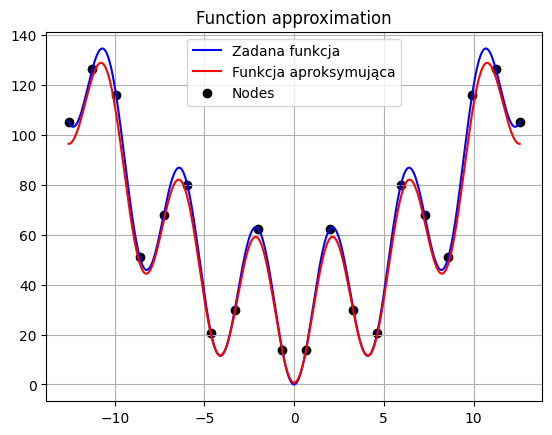

In [61]:
analyse(20, 6, "img14")

Max:  8.08047835401392 Mean:  3.0744611329119906


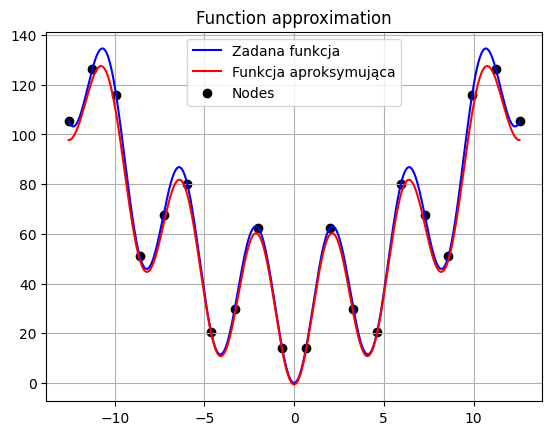

In [62]:
analyse(20, 7, "img15")

Max:  8.462766260269944 Mean:  3.0732819027072824


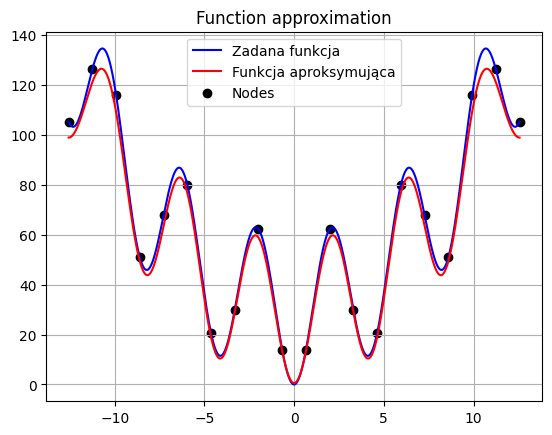

In [63]:
analyse(20, 8, "img16")

Max:  8.704712964676474 Mean:  3.0721661277409735


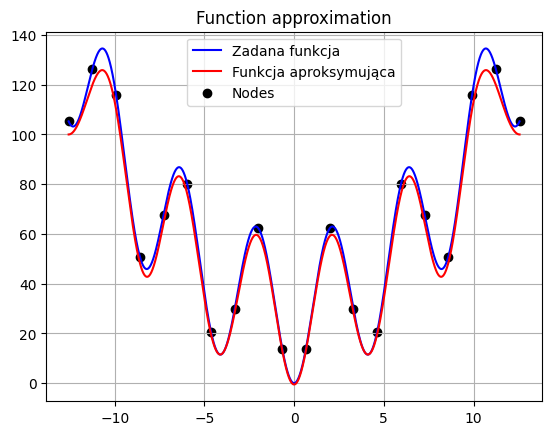

In [64]:
analyse(20, 9, "img17")

In [65]:
errors(25, True)

degree | max diff | mean diff
1  |  36.44840413283019  |  2.48576333872048
2  |  34.21731472843363  |  2.475286150432353
3  |  34.21023660834429  |  2.470493697141477
4  |  32.16492814004839  |  2.4676863430007208
5  |  32.69694328462208  |  2.465792504443347
6  |  8.901296067450545  |  2.493188827372968
7  |  7.786221525292845  |  2.4920737528308075
8  |  6.850436811708121  |  2.491137968117224
9  |  6.780600535509166  |  2.4903157131265927
10  |  6.816203837752454  |  2.489563484851709
11  |  6.822968013413572  |  2.4888494817842437
12  |  6.833321837265146  |  2.488147643249056


In [66]:
errors(25, False)

max diff
36.44840413283019
34.21731472843363
34.21023660834429
32.16492814004839
32.69694328462208
8.901296067450545
7.786221525292845
6.850436811708121
6.780600535509166
6.816203837752454
6.822968013413572
6.833321837265146
mean diff
2.48576333872048
2.475286150432353
2.470493697141477
2.4676863430007208
2.465792504443347
2.493188827372968
2.4920737528308075
2.491137968117224
2.4903157131265927
2.489563484851709
2.4888494817842437
2.488147643249056


Max:  8.901296067450545 Mean:  2.493188827372968


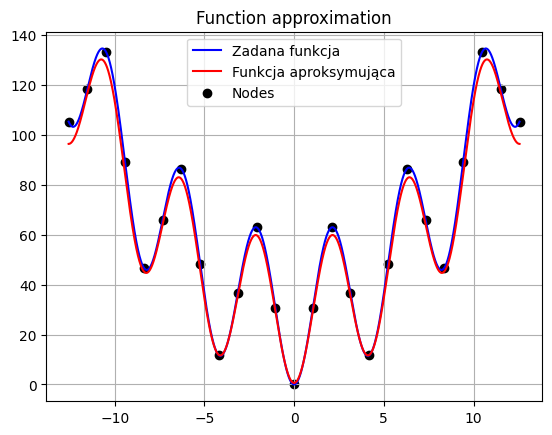

In [77]:
analyse(25, 6, "img19")

Max:  7.786221525292845 Mean:  2.4920737528308075


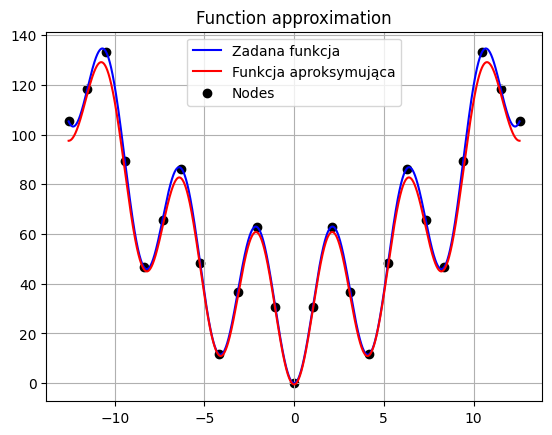

In [78]:
analyse(25, 7, "img20")

Max:  6.850436811708121 Mean:  2.491137968117224


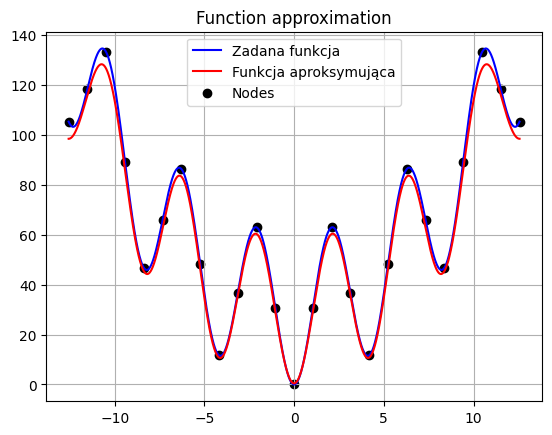

In [79]:
analyse(25, 8, "img21")

Max:  6.780600535509166 Mean:  2.4903157131265927


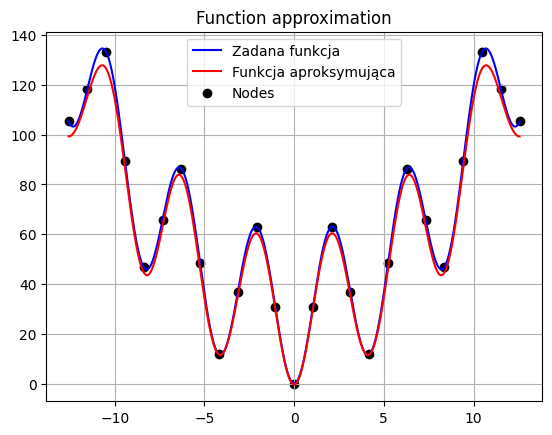

In [80]:
analyse(25, 9, "img22")

In [81]:
errors(50, True)

degree | max diff | mean diff
1  |  37.9943402786494  |  1.2715754985833794
2  |  33.04273949089802  |  1.261064683407817
3  |  33.025904983929586  |  1.256361038120542
4  |  31.451225617685445  |  1.2536896502739494
5  |  30.66435332168284  |  1.251958626962476
6  |  8.148989790669987  |  1.2801381161984888
7  |  7.235979594438106  |  1.279225106002259
8  |  6.522208113208279  |  1.2785113345210288
9  |  5.944674460686613  |  1.2779338008685084
10  |  5.464211980980934  |  1.2774533383888016
11  |  5.055171515782632  |  1.2770442979236014
12  |  4.700031053829292  |  1.2766891574616472
13  |  4.386390152349577  |  1.2763755165601682
14  |  4.1052026157273644  |  1.2760943290235478
15  |  3.8496900700739616  |  1.2758388164778953
16  |  3.614648258052952  |  1.2756037746658724
17  |  3.3959891352232603  |  1.2753851155430442
18  |  3.1904294468380954  |  1.2751795558546575
19  |  3.024142079142237  |  1.2749843993423329
20  |  3.001944813353049  |  1.2747973802059938
21  |  3.019381767

In [82]:
errors(50, False)

max diff
37.9943402786494
33.04273949089802
33.025904983929586
31.451225617685445
30.66435332168284
8.148989790669987
7.235979594438106
6.522208113208279
5.944674460686613
5.464211980980934
5.055171515782632
4.700031053829292
4.386390152349577
4.1052026157273644
3.8496900700739616
3.614648258052952
3.3959891352232603
3.1904294468380954
3.024142079142237
3.001944813353049
3.01938176708029
3.0396317035129528
3.0523927148323367
3.0602058588087857
3.0644361899270507
mean diff
1.2715754985833794
1.261064683407817
1.256361038120542
1.2536896502739494
1.251958626962476
1.2801381161984888
1.279225106002259
1.2785113345210288
1.2779338008685084
1.2774533383888016
1.2770442979236014
1.2766891574616472
1.2763755165601682
1.2760943290235478
1.2758388164778953
1.2756037746658724
1.2753851155430442
1.2751795558546575
1.2749843993423329
1.2747973802059938
1.2746165473392956
1.274440175960275
1.2742666975916495
1.274094642013387
1.2739225864351231


Max:  3.024142079142237 Mean:  1.2749843993423329


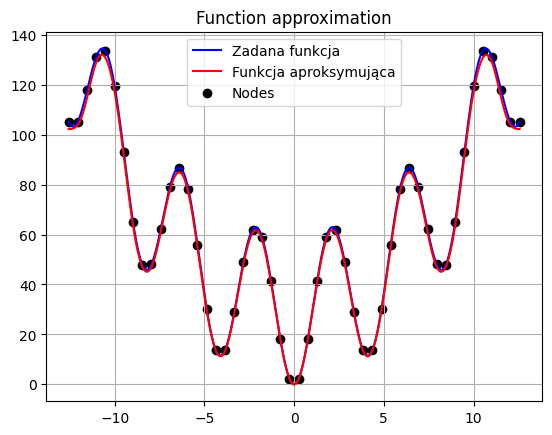

In [88]:
analyse(50, 19, "img24")

Max:  3.001944813353049 Mean:  1.2747973802059938


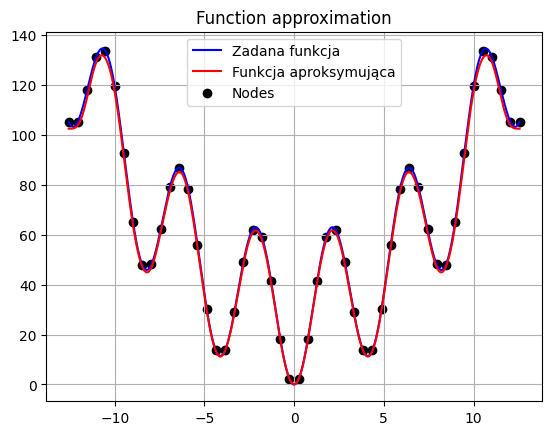

In [89]:
analyse(50, 20, "img25")

Max:  3.01938176708029 Mean:  1.2746165473392956


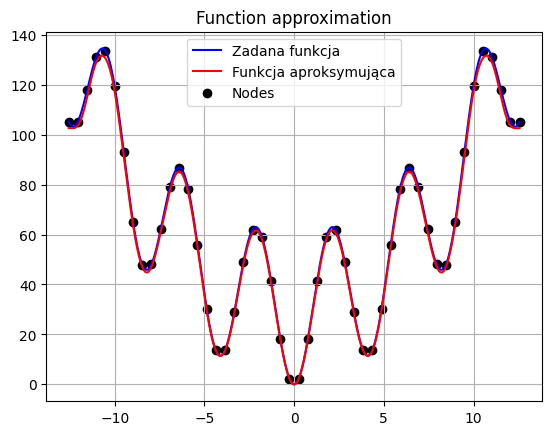

In [90]:
analyse(50, 21, "img26")

Max:  3.0644361899270507 Mean:  1.2739225864351231


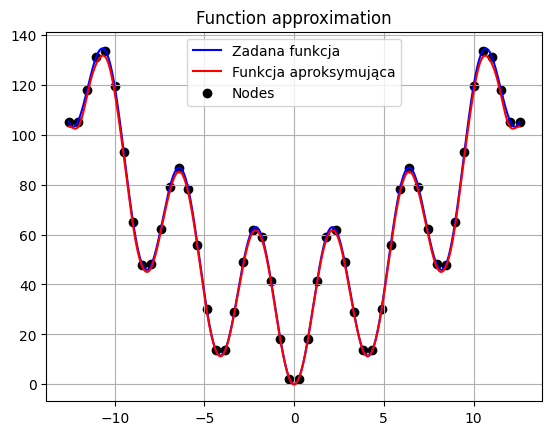

In [91]:
analyse(50, 25, "img27")

In [98]:
errors2(5, True)

degree | max diff | mean diff
10  |  51.44370170576239  |  5.729416144407416
11  |  60.64602444998161  |  5.281860116867471
12  |  56.37126268985291  |  4.8965819743885834
13  |  36.74458910834437  |  4.534443390329363
14  |  36.070013756276126  |  4.241614649013697
15  |  35.51559035613934  |  3.9834486874404926
16  |  35.050292593829724  |  3.754275690335386
17  |  34.652370506799656  |  3.549562052779202
18  |  34.30472006493635  |  3.3656507654024495
19  |  33.99752263828859  |  3.199565657488275
20  |  33.72355952844032  |  3.048863696029515
21  |  33.477357349077124  |  2.911522962911433
22  |  33.25466112394601  |  2.7858570704857684
23  |  33.052094550773774  |  2.670449238534547
24  |  32.86693244487114  |  2.564101084137979
25  |  32.69694328462208  |  2.465792504443347
26  |  32.54027718238319  |  2.374649990713805
27  |  32.39538423689413  |  2.289921403480992
28  |  32.26095377605252  |  2.210955739410295
29  |  32.13586831745471  |  2.1371867853182733
30  |  32.0191681224

In [99]:
errors2(5, False)

max diff
51.44370170576239
60.64602444998161
56.37126268985291
36.74458910834437
36.070013756276126
35.51559035613934
35.050292593829724
34.652370506799656
34.30472006493635
33.99752263828859
33.72355952844032
33.477357349077124
33.25466112394601
33.052094550773774
32.86693244487114
32.69694328462208
32.54027718238319
32.39538423689413
32.26095377605252
32.13586831745471
32.01916812248817
31.910023521274624
31.80771303457621
31.711605885503474
31.621147880376043
31.535849906808025
31.455278487202932
31.37904796249903
31.30681398065984
31.238268038045646
31.173132876886953
31.111158583731097
31.052119265569672
30.995810204901886
30.942045414092888
30.890655524370658
30.841485956649166
30.794395330790735
30.749254077474177
30.705943222923054
30.66435332168284
30.62438351666475
30.585940708965126
30.548938822689962
30.513298152256695
30.478944781513206
30.445810065568708
30.413830167537725
30.38294564349067
30.353101069832803
30.324244708113213
30.296328202931136
30.269306309176727
30.243

Max:  51.44370170576239 Mean:  5.729416144407416


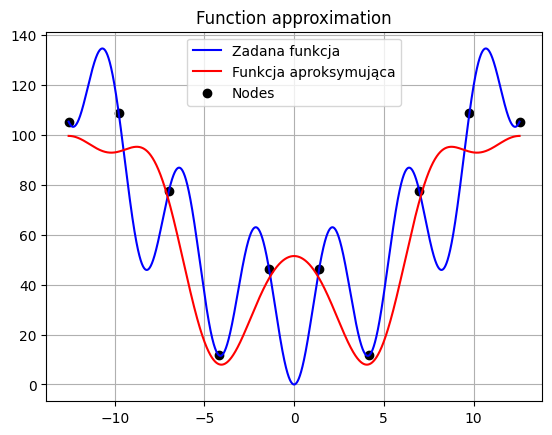

In [105]:
analyse(10, 5, "img29")

Max:  33.72355952844032 Mean:  3.048863696029515


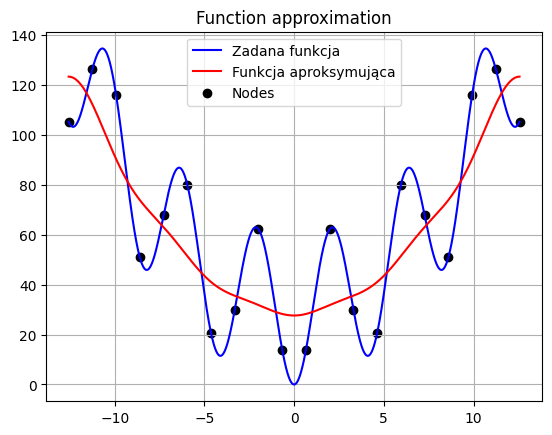

In [106]:
analyse(20, 5, "img30")

Max:  30.66435332168284 Mean:  1.251958626962476


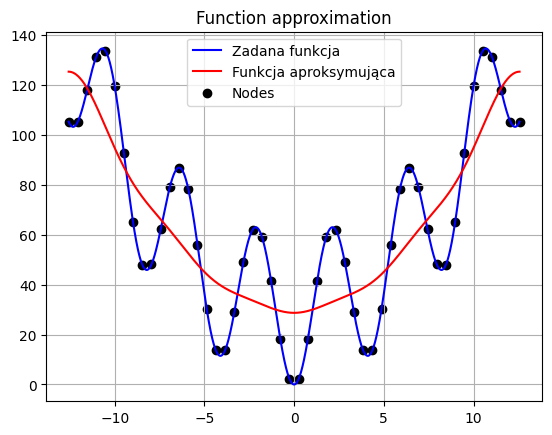

In [107]:
analyse(50, 5, "img31")

Max:  29.794443388100625 Mean:  0.6221901134688892


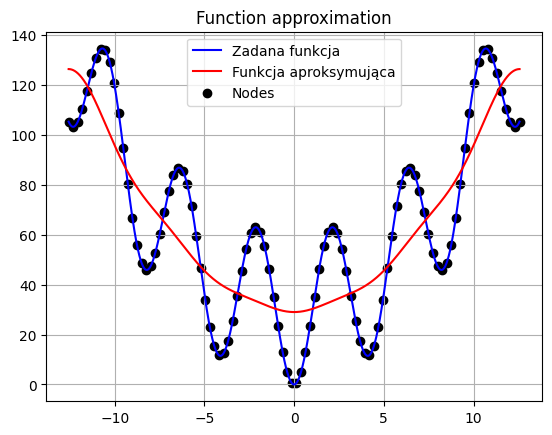

In [108]:
analyse(100, 5, "img32")

In [109]:
errors2(6, True)

degree | max diff | mean diff
12  |  33.619465893326556  |  4.920825851296635
13  |  34.44075514604407  |  4.587128626732472
14  |  11.237027693687608  |  4.267123926102048
15  |  10.285330902589479  |  4.009338970662335
16  |  9.513920498982486  |  3.780460856333357
17  |  8.870971481535378  |  3.5759835491233822
18  |  8.724184315369172  |  3.392266734142098
19  |  8.820467267023147  |  3.2263449825521513
20  |  8.880177698520725  |  3.0757825164255683
21  |  8.91362474180761  |  2.9385625145352705
22  |  8.928004071972325  |  2.813002288094591
23  |  8.928437061274167  |  2.6976878149898202
24  |  8.918628655440472  |  2.5914228166146387
25  |  8.901296067450545  |  2.493188827372968
26  |  8.878455142808264  |  2.4021136340987224
27  |  8.851615812034112  |  2.317446137703233
28  |  8.821918030591902  |  2.2385361811550872
29  |  8.7902279121964  |  2.1648182475979136
30  |  8.757206722932608  |  2.095798197016847
31  |  8.723361054665048  |  2.0310424058233236
32  |  8.68907974551

In [110]:
errors2(6, False)

max diff
33.619465893326556
34.44075514604407
11.237027693687608
10.285330902589479
9.513920498982486
8.870971481535378
8.724184315369172
8.820467267023147
8.880177698520725
8.91362474180761
8.928004071972325
8.928437061274167
8.918628655440472
8.901296067450545
8.878455142808264
8.851615812034112
8.821918030591902
8.7902279121964
8.757206722932608
8.723361054665048
8.689079745510142
8.654661338521947
8.6203347003825
8.586274638957917
8.552613826139662
8.519451965117497
8.48686288456014
8.45490006062144
8.423600937842934
8.392990326189079
8.363083082996596
8.333886238225986
8.305400684004724
8.277622521477298
8.250544136894973
8.224155062891782
8.198442668681878
8.17339271353842
8.148989790669987
8.125217682985848
8.10205964785085
8.079498644486435
8.057517514966875
8.036099127608907
8.015226489850619
7.994882836359579
7.975051697021556
7.955716948586399
7.936862853049945
7.918474085280877
7.900535751939216
7.883033403367747
7.865953039824376
7.8492811131837925
7.833004525027917
7.8171

Max:  33.619465893326556 Mean:  4.920825851296635


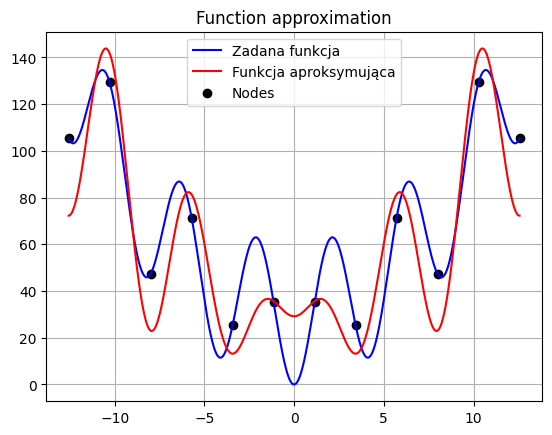

In [112]:
analyse(12, 6, "img34")

Max:  8.880177698520725 Mean:  3.0757825164255683


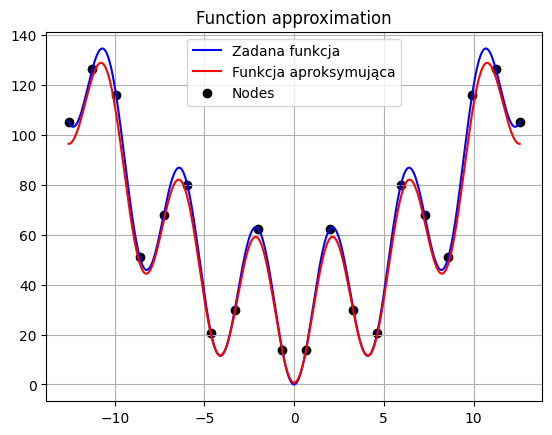

In [113]:
analyse(20, 6, "img35")

Max:  8.148989790669987 Mean:  1.2801381161984888


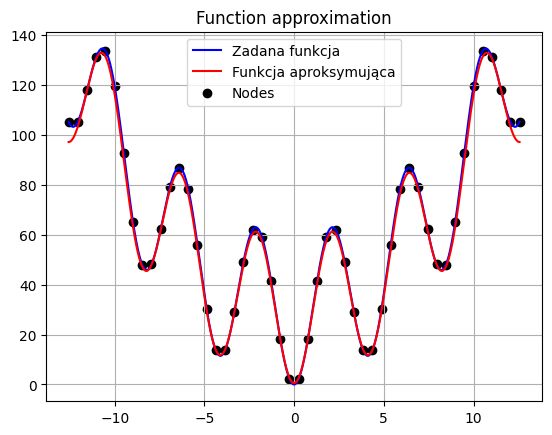

In [114]:
analyse(50, 6, "img36")

Max:  7.446084605316756 Mean:  0.6507024981845492


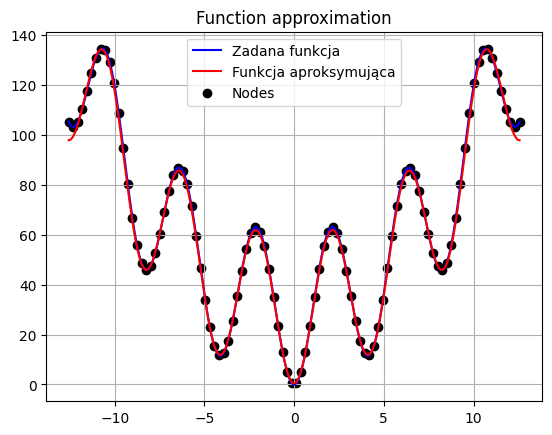

In [117]:
analyse(100, 6, "img37")

In [118]:
errors2(10, True)

degree | max diff | mean diff
20  |  8.895786648416689  |  3.0710503527746638
21  |  8.350069828818079  |  2.934160708948249
22  |  7.8866938187643  |  2.8088595467625375
23  |  7.48367004717187  |  2.6937526955702045
24  |  7.130172758796505  |  2.587657116096308
25  |  6.816203837752454  |  2.489563484851709
26  |  6.534090612396028  |  2.3986060886418237
27  |  6.279040156797379  |  2.3140385662165994
28  |  6.048150816309288  |  2.2352142888093107
29  |  5.836792792368641  |  2.16157041657971
30  |  5.642445194936698  |  2.092614874250853
31  |  5.59660926184759  |  2.0279156540305063
32  |  5.612242595526041  |  1.9670919827388453
33  |  5.622109857380693  |  1.9098069898931258
34  |  5.6272725598129085  |  1.8557615906716851
35  |  5.628586787623021  |  1.8046893574040008
36  |  5.6267474798754336  |  1.7563521995859883
37  |  5.622322070469238  |  1.7105367085435161
38  |  5.615776311444989  |  1.667051051146991
39  |  5.607494284318705  |  1.6257223192260275
40  |  5.5977940427

In [119]:
errors2(10, False)

max diff
8.895786648416689
8.350069828818079
7.8866938187643
7.48367004717187
7.130172758796505
6.816203837752454
6.534090612396028
6.279040156797379
6.048150816309288
5.836792792368641
5.642445194936698
5.59660926184759
5.612242595526041
5.622109857380693
5.6272725598129085
5.628586787623021
5.6267474798754336
5.622322070469238
5.615776311444989
5.607494284318705
5.597794042710078
5.586939937922651
5.575152402524907
5.562615769151549
5.549484558567926
5.535888566352909
5.521937000189297
5.507721862081709
5.493320726438128
5.4787990320651545
5.464211980980934
5.449606117633294
5.435020647101624
5.420488539196668
5.406037456210669
5.391690534834709
5.377467047030933
5.363382960086923
5.349451412415519
5.3356831187111595
5.322086715711791
5.308669057871214
5.295435470675443
5.282389968056336
5.269535439291943
5.256873809916527
5.2444061804434625
5.232132946110994
5.2200539003581525
5.208168324331922
5.196475064374454
5.184972599155344
5.17365909786588
5.162532470684866
5.151590412558448


Max:  8.895786648416689 Mean:  3.0710503527746638


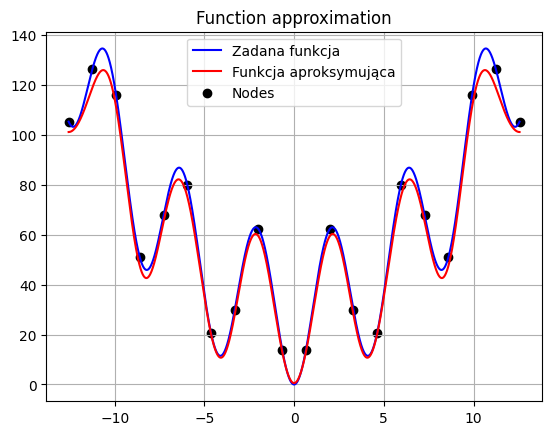

In [124]:
analyse(20, 10, "img39")

Max:  5.642445194936698 Mean:  2.092614874250853


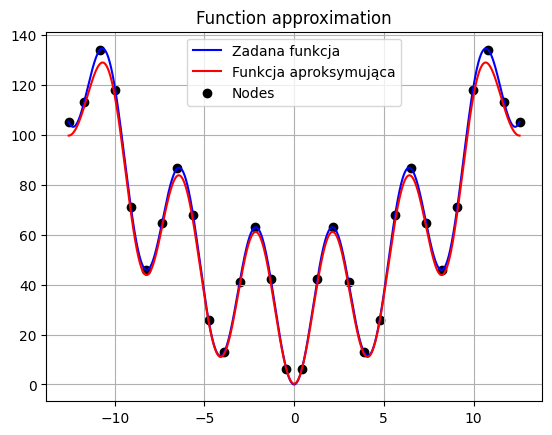

In [125]:
analyse(30, 10, "img40")

Max:  5.464211980980934 Mean:  1.2774533383888016


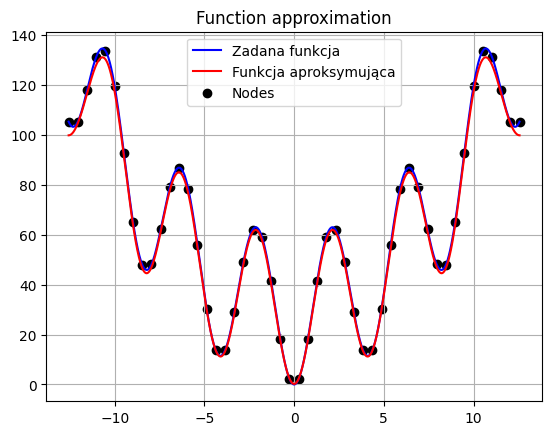

In [126]:
analyse(50, 10, "img41")

Max:  4.922597898759719 Mean:  0.6481790114779924


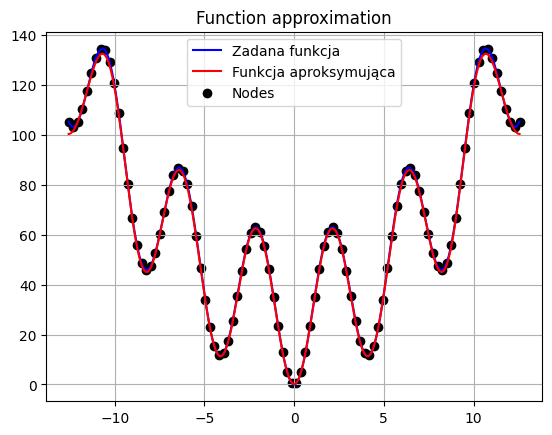

In [127]:
analyse(100, 10, "img42")

In [129]:
errors2(20, True)

degree | max diff | mean diff
40  |  3.8792827352649937  |  1.5831579831178022
41  |  3.7606739546633747  |  1.5457776951393496
42  |  3.650858913938336  |  1.5101183757484549
43  |  3.549337838796376  |  1.4760644554581157
44  |  3.4560711049225574  |  1.443510398005382
45  |  3.368685178048935  |  1.4123596511076253
46  |  3.286592464665034  |  1.3825237224951767
47  |  3.2092857437867934  |  1.3539213650802413
48  |  3.1363244073298375  |  1.3264778571640765
49  |  3.067323485253894  |  1.3001243654410999
50  |  3.001944813353049  |  1.2747973802059938
51  |  2.9398898661545303  |  1.250438213611742
52  |  2.880893895870301  |  1.2269925530712973
53  |  2.8587705373431618  |  1.2044100629735286
54  |  2.8712671978658193  |  1.1826440288058817
55  |  2.8819927793072395  |  1.1616510385700467
56  |  2.8911422551317685  |  1.1413906970548044
57  |  2.898886635462219  |  1.121825369115328
58  |  2.905376350971011  |  1.1029199486064607
59  |  2.910744091970031  |  1.0846416500492553
60 

In [130]:
errors2(20, False)

max diff
3.8792827352649937
3.7606739546633747
3.650858913938336
3.549337838796376
3.4560711049225574
3.368685178048935
3.286592464665034
3.2092857437867934
3.1363244073298375
3.067323485253894
3.001944813353049
2.9398898661545303
2.880893895870301
2.8587705373431618
2.8712671978658193
2.8819927793072395
2.8911422551317685
2.898886635462219
2.905376350971011
2.910744091970031
2.9151072013624884
2.9185697002683924
2.921224009698463
2.9231524195312346
2.92442834642533
2.9251174147319574
2.925278388334604
2.9249639764880726
2.9242215327444683
2.923093662861163
2.921618754962992
2.919831443077996
2.9177630134281287
2.9154417613565613
2.9128933056043422
2.910140865619354
2.9072055067522626
2.904106357483755
2.900860802232458
2.8974846528099363
2.893992301141992
2.8903968555425763
2.886710262491576
2.882943415654239
2.8791062535954097
2.8752078475056635
2.8712564800700022
2.8672597164570277
2.8632244683109036
2.8591570514979736
2.8550632382919616
2.8509483045716593
2.8468170725776645
2.84267

Max:  3.8792827352649937 Mean:  1.5831579831178022


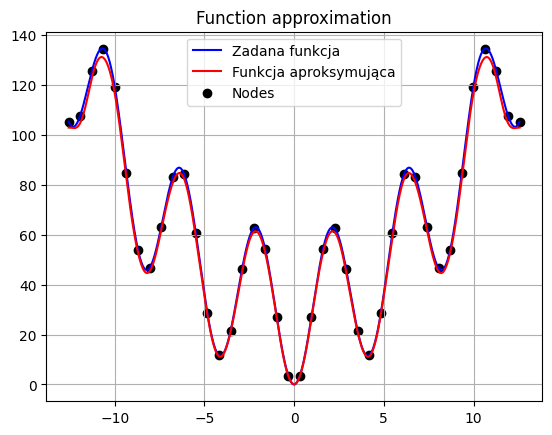

In [134]:
analyse(40, 20, "img44")

Max:  3.001944813353049 Mean:  1.2747973802059938


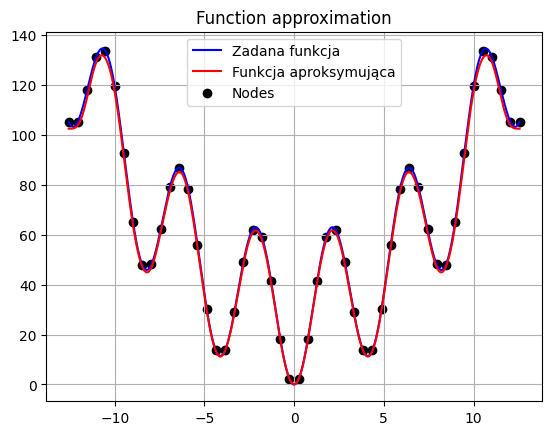

In [135]:
analyse(50, 20, "img45")

Max:  2.921618754962992 Mean:  0.9174303684710744


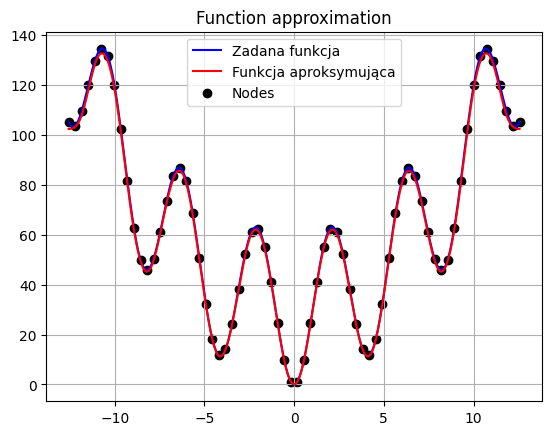

In [136]:
analyse(70, 20, "img46")

Max:  2.8136371018577933 Mean:  0.6460700506810904


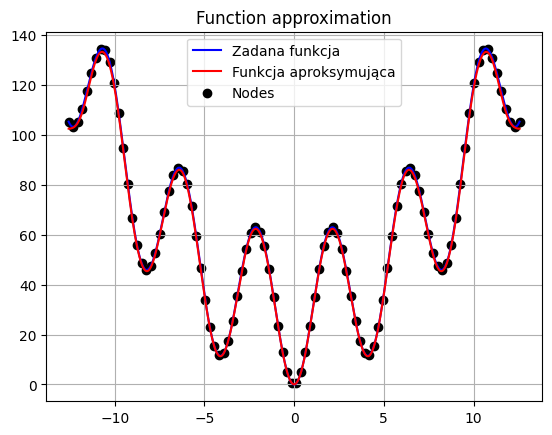

In [137]:
analyse(100, 20, "img47")

In [144]:
def find_best_approx():
    
    min_n, min_m, max_n, max_m = -1, -1, -1, -1
    
    min_err = float('inf')
    max_err = float('-inf')
    
    n_generator = (i for i in range(1, 50 + 1))
    
    for n in n_generator:
        
        print(f"Calculating for n = {n}")
        
        m_generator = (i for i in range(1, n // 2 + 1))
        
        for m in m_generator:
            
            temp = approximation_maximum_difference(n, m, 1000)
        
            if temp < min_err:
                min_err = temp
                min_n = n
                min_m = m
                
            if temp > max_err:
                max_err = temp
                max_n = n
                max_m = m
    
    return min_n, min_m, max_n, max_m

In [145]:
min_n, min_m, max_n, max_m = find_best_approx()

Calculating for n = 1
Calculating for n = 2
Calculating for n = 3
Calculating for n = 4
Calculating for n = 5
Calculating for n = 6
Calculating for n = 7
Calculating for n = 8
Calculating for n = 9
Calculating for n = 10
Calculating for n = 11
Calculating for n = 12
Calculating for n = 13
Calculating for n = 14
Calculating for n = 15
Calculating for n = 16
Calculating for n = 17
Calculating for n = 18
Calculating for n = 19
Calculating for n = 20
Calculating for n = 21
Calculating for n = 22
Calculating for n = 23
Calculating for n = 24
Calculating for n = 25
Calculating for n = 26
Calculating for n = 27
Calculating for n = 28
Calculating for n = 29
Calculating for n = 30
Calculating for n = 31
Calculating for n = 32
Calculating for n = 33
Calculating for n = 34
Calculating for n = 35
Calculating for n = 36
Calculating for n = 37
Calculating for n = 38
Calculating for n = 39
Calculating for n = 40
Calculating for n = 41
Calculating for n = 42
Calculating for n = 43
Calculating for n = 

Max:  3.001944813353049 Mean:  1.2747973802059938


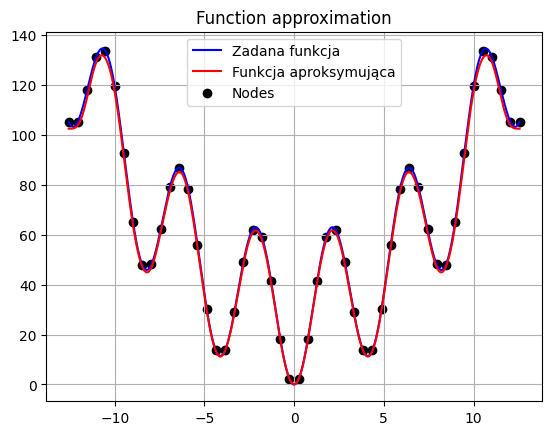

50 20


In [150]:
analyse(min_n, min_m, "best")
print(min_n, min_m)

Max:  102.20803710021472 Mean:  12.389014947633774


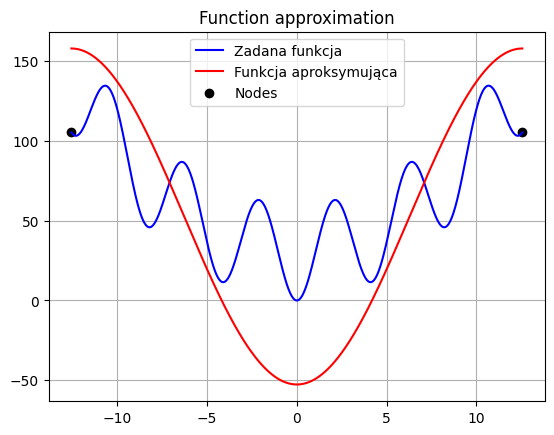

2 1


In [149]:
analyse(max_n, max_m, "worst")
print(max_n, max_m)